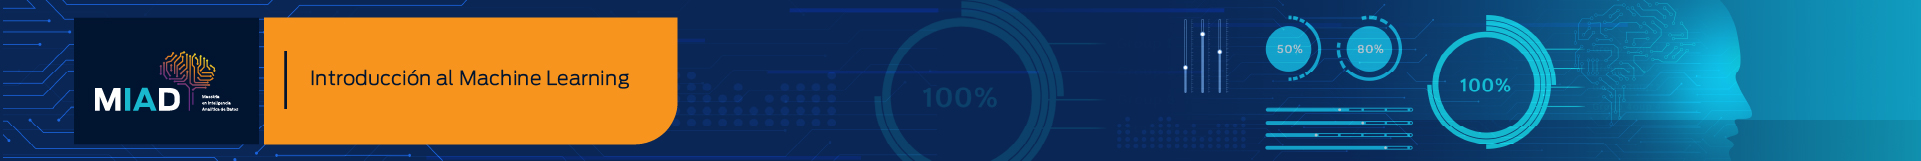

# Deep learning - Semana 2
## Redes neuronales: Funciones de activación con Keras

### Propósito de la actividad

En esta actividad podrán poner en práctica el uso de diferentes funciones de activación para cambiar el desempeño y la convergencia de redes neuronales de tipo feedforward. Para ello, utilizaremos las diferentes funciones que implementa la librería Keras.

### Instrucciones generales

1. Para realizar la actividad solo siga las indicaciones asociadas a cada celda del notebook. Sin embargo, siéntase libre de modificar el archivo editando las celdas, lo que le permitirá afianzar su comprensión sobre las distintas funcionalidades de código.  

2. Recuerde que para esta actividad NO necesita realizar ningún tipo de entrega.

### Librerías a importar

A continuación se muestran los comandos a ejecutar para poder implementar los procedimientos de este notebook:


In [46]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.layers.core import Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras import activations
import matplotlib.pyplot as plt

### Cargando los datos

En primer lugar, cargaremos datos del National Institute of Diabetes and Digestive and Kidney Diseases.

En este contexto, la variable de respuesta corresponde a si la observación corresponde a un paciente con diabetes (y=1) o si no lo es (y=0) y las variables predictivas son las siguientes:


1. Número de veces en embarazo
2. Concentración de glucosa a 2 horas de test de toleranci
3. Presión sanguínea diastólica
4. Grosor de pliegue de triceps
5. Insulina 2 horas
6. Indice de masa corporal
7. Función de pedigree de diabetes 
8. Edad

In [20]:
# Cargar los datos
dataset = pd.read_csv('test2.csv', sep=",").to_numpy()  
X_train, X_test, y_train, y_test = train_test_split(dataset[:,0:8], dataset[:,8], test_size=0.20)

### Funciones de activación

En una red neuronal de tipo feedforward, la información se transmite de manera secuencial entre las capas que conforman estos modelos. En particular, el valor de un nodo es el valor que se obtiene de evaluar una función de activación en una transformación afín de los nodos de la capa anterior. Algebraicamente tendríamos:

$$a_{i,j}=f_{i}(\sum_{k=1}^{n_{i-1}}w_{i,k}a_{i-1,k}+b_{i,j})$$

De esta manera, la función de activación puede ser etendida como una manera de resumir la información de los nodos anteriores y, por lo tanto, el desempeño del modelo y la convergencia de su estimación depende en gran medida de la función de activación que se use en cada una de las capas del modelo.


### Función de activación sigmoide

Esta función tiene como dominio los números reales y su rango corresponde a los números reales entre 0 y 1. Las dos expresiones más comunes para esta función se presentan a continuación:
$$f(x)=\frac{1}{1+e^{-x}}=\frac{e^{x}}{1+e^{x}}$$
A continuación se muestra gráficamente esta función:

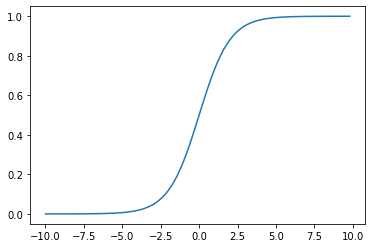

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a
x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.plot(x,sig)
plt.show()

El código para implementar esta función de activación para las capas de una red neuronal de tipo feedforward se muestra enseguida:

In [ ]:
model1 = Sequential()
model1.add(Dense(12, input_dim=8, activation='sigmoid'))
model1.add(Dense(8, activation='sigmoid'))
model1.add(Dense(1, activation='sigmoid'))

### Función de activación ReLU (rectificadora)

Esta función tiene como dominio los números reales y su rango corresponde a los números reales mayores o iguales a 0:
$$f(x)=max(0,x)$$
A continuación se muestra gráficamente esta función:

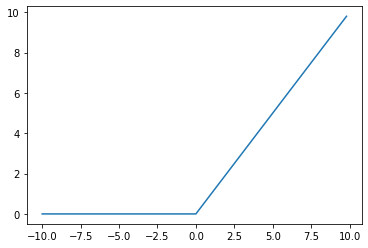

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
def ReLU(x):
    a = []
    for item in x:
        if item<0:
            a.append(0)
        else:
            a.append(item)
    return a
x = np.arange(-10., 10., 0.2)
ReLUplt = ReLU(x)
plt.plot(x,ReLUplt)
plt.show()

El código para implementar esta función de activación para las capas de una red neuronal de tipo feedforward se muestra enseguida:

In [ ]:
model2 = Sequential()
model2.add(Dense(12, input_dim=8, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='relu'))

### Función de activación Softplus

Esta función tiene como dominio los números reales y su rango corresponde a los números reales mayores o iguales a 0:
$$f(x)=ln(1+e^{x})$$
A continuación se muestra gráficamente esta función:

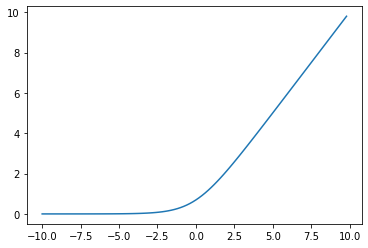

In [12]:
import numpy as np
import math
import matplotlib.pyplot as plt
def Softplus(x):
    a = []
    for item in x:
        a.append(np.log(1+math.exp(item)))
    return a
x = np.arange(-10., 10., 0.2)
Softplusplt = Softplus(x)
plt.plot(x,Softplusplt)
plt.show()

El código para implementar esta función de activación para las capas de una red neuronal de tipo feedforward se muestra enseguida:

In [ ]:
model3 = Sequential()
model3.add(Dense(12, input_dim=8, activation='softplus'))
model3.add(Dense(8, activation='softplus'))
model3.add(Dense(1, activation='softplus'))

### Función de activación Softsign

Esta función tiene como dominio los números reales y su rango corresponde a los números reales entre -1 y 1:
$$f(x)=\frac{x}{1+|x|}$$
A continuación se muestra gráficamente esta función:

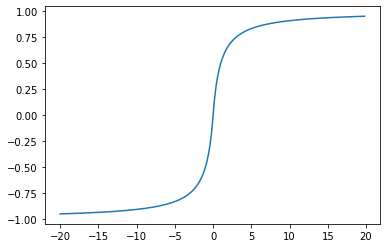

In [15]:
import numpy as np
import math
import matplotlib.pyplot as plt
def Softsign(x):
    a = []
    for item in x:
        a.append(item/(1+abs(item)))
    return a
x = np.arange(-20., 20., 0.2)
Softsignsplt = Softsign(x)
plt.plot(x,Softsignsplt)
plt.show()

El código para implementar esta función de activación para las capas de una red neuronal de tipo feedforward se muestra enseguida:

In [ ]:
model4 = Sequential()
model4.add(Dense(12, input_dim=8, activation='softsign'))
model4.add(Dense(8, activation='softsign'))
model4.add(Dense(1, activation='softsign'))

### Función de activación tangente hiperbólica

Esta función tiene como dominio los números reales y su rango corresponde a los números reales entre -1 y 1:
$$f(x)=tanh(x)=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}=\frac{e^{2x}-1}{e^{2x}+1}$$
A continuación se muestra gráficamente esta función:

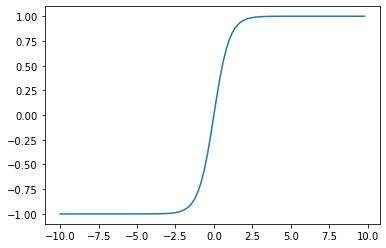

In [17]:
import numpy as np
import math
import matplotlib.pyplot as plt
def tanhHM(x):
    a = []
    for item in x:
        a.append(math.tanh(item))
    return a
x = np.arange(-10., 10., 0.2)
tanhplt = tanhHM(x)
plt.plot(x,tanhplt)
plt.show()

El código para implementar esta función de activación para las capas de una red neuronal de tipo feedforward se muestra enseguida:

In [ ]:
model5 = Sequential()
model5.add(Dense(12, input_dim=8, activation='tanh'))
model5.add(Dense(8, activation='tanh'))
model5.add(Dense(1, activation='tanh'))

### Función de activación SELU

Esta función tiene como dominio los números reales y su rango corresponde a los números reales mayores o iguales a -1.75809934084737:
$$f(x)=I(x>0)\lambda x+I(x\leq 0)\lambda \alpha(e^{x}-1)$$

Donde $\lambda$ y $\alpha$ son constantes predefinidas, con $\lambda=1.0507009873554804934193349852946$ y $\alpha=1.6732632423543772848170429916717$.

A continuación se muestra gráficamente esta función:

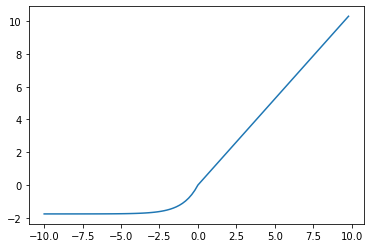

In [18]:
import numpy as np
import math
import matplotlib.pyplot as plt
def SELU(x):
    a = []
    for item in x:
        if item>0:
            a.append(1.0507009873554804934193349852946*item)
        else:
            a.append(1.0507009873554804934193349852946*1.6732632423543772848170429916717*(math.exp(item)-1))
    return a
x = np.arange(-10., 10., 0.2)
SELUplt = SELU(x)
plt.plot(x,SELUplt)
plt.show()

El código para implementar esta función de activación para las capas de una red neuronal de tipo feedforward se muestra enseguida:

In [ ]:
model6 = Sequential()
model6.add(Dense(12, input_dim=8, activation='selu'))
model6.add(Dense(8, activation='selu'))
model6.add(Dense(1, activation='selu'))

### Función de activación ELU

Esta función tiene como dominio los números reales y su rango corresponde a los números reales mayores o iguales a -1:
$$f(x)=I(x>0)x+I(x\leq 0)\alpha(e^{x}-1)$$

Donde $\alpha$ puede ser cualquier número real mayor que cero.

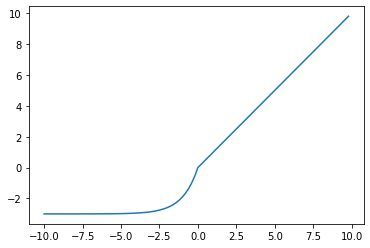

In [22]:
import numpy as np
import math
import matplotlib.pyplot as plt
def ELU(x,alpha):
    a = []
    for item in x:
        if item>0:
            a.append(item)
        else:
            a.append(alpha*(math.exp(item)-1))
    return a
x = np.arange(-10., 10.,0.2)
ELUplt = ELU(x,3)
plt.plot(x,ELUplt)
plt.show()

El código para implementar esta función de activación para las capas de una red neuronal de tipo feedforward se muestra enseguida:

In [ ]:
model7 = Sequential()
model7.add(Dense(12, input_dim=8, activation='elu'))
model7.add(Dense(8, activation='elu'))
model7.add(Dense(1, activation='elu'))

### Función de activación exponencial

Esta función tiene como dominio los números reales y su rango corresponde a los números reales mayores o iguales a 0:
$$f(x)=e^{x}$$

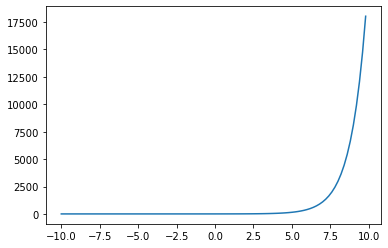

In [23]:
import numpy as np
import math
import matplotlib.pyplot as plt
def exponencial(x):
    a = []
    for item in x:
        a.append(math.exp(item))
    return a
x = np.arange(-10., 10.,0.2)
exponencialplt = exponencial(x)
plt.plot(x,exponencialplt)
plt.show()

El código para implementar esta función de activación para las capas de una red neuronal de tipo feedforward se muestra enseguida:

In [ ]:
model8 = Sequential()
model8.add(Dense(12, input_dim=8, activation='exponential'))
model8.add(Dense(8, activation='exponential'))
model8.add(Dense(1, activation='exponential'))

### Compilación de los modelos 

Se debe seleccionar un función de pérdida, que en este caso es la función cross-entropy, el optimizador y el accuracy que se quiere evaluar. 

In [36]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model7.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model8.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Se entrenan los modelos con los datos de entrenamiento

In [59]:
history1=model1.fit(X_train, y_train, epochs=10, batch_size=10 )
history2=model2.fit(X_train, y_train, epochs=10, batch_size=10 )
history3=model3.fit(X_train, y_train, epochs=10, batch_size=10 )
history4=model4.fit(X_train, y_train, epochs=10, batch_size=10 )
history5=model5.fit(X_train, y_train, epochs=10, batch_size=10 )
history6=model6.fit(X_train, y_train, epochs=10, batch_size=10 )
history7=model7.fit(X_train, y_train, epochs=10, batch_size=10 )
history8=model8.fit(X_train, y_train, epochs=10, batch_size=10 )

Epoch 1/10
62/62 [==============================] - 0s 617us/step - loss: 0.4328 - accuracy: 0.8062
Epoch 2/10
62/62 [==============================] - 0s 574us/step - loss: 0.4313 - accuracy: 0.7948
Epoch 3/10
62/62 [==============================] - 0s 589us/step - loss: 0.4328 - accuracy: 0.7899
Epoch 4/10
62/62 [==============================] - 0s 591us/step - loss: 0.4289 - accuracy: 0.8013
Epoch 5/10
62/62 [==============================] - 0s 557us/step - loss: 0.4374 - accuracy: 0.7997
Epoch 6/10
62/62 [==============================] - 0s 573us/step - loss: 0.4301 - accuracy: 0.7964
Epoch 7/10
62/62 [==============================] - 0s 556us/step - loss: 0.4263 - accuracy: 0.8013
Epoch 8/10
62/62 [==============================] - 0s 557us/step - loss: 0.4339 - accuracy: 0.7997
Epoch 9/10
62/62 [==============================] - 0s 557us/step - loss: 0.4296 - accuracy: 0.8062
Epoch 10/10
62/62 [==============================] - 0s 573us/step - loss: 0.4265 - accuracy: 0.8046

Se calcula el accuracy de los modelos en con las bases de datos de train

In [60]:
_, accuracy = model1.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

_, accuracy = model2.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

_, accuracy = model3.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

_, accuracy = model4.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

_, accuracy = model5.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

_, accuracy = model6.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

_, accuracy = model7.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

_, accuracy = model8.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

20/20 [==============================] - 0s 583us/step - loss: 0.4187 - accuracy: 0.8111
Accuracy: 81.11
20/20 [==============================] - 0s 575us/step - loss: 0.4644 - accuracy: 0.7866
Accuracy: 78.66
20/20 [==============================] - 0s 630us/step - loss: 0.4445 - accuracy: 0.8029
Accuracy: 80.29
20/20 [==============================] - 0s 630us/step - loss: 0.6210 - accuracy: 0.6629
Accuracy: 66.29
20/20 [==============================] - 0s 561us/step - loss: 0.6506 - accuracy: 0.6629
Accuracy: 66.29


Se hacen predicciones utilizando los modelos

In [61]:
predicciones = model.predict(X_test)
redondeado = [round(x[0]) for x in predicciones]
predicciones = (model.predict(X_test) > 0.5).astype(int)

predicciones1 = model1.predict(X_test)
redondeado1 = [round(x[0]) for x in predicciones1]
predicciones1 = (model1.predict(X_test) > 0.5).astype(int)

predicciones2 = model2.predict(X_test)
redondeado2 = [round(x[0]) for x in predicciones2]
predicciones2 = (model2.predict(X_test) > 0.5).astype(int)

predicciones3 = model3.predict(X_test)
redondeado3 = [round(x[0]) for x in predicciones3]
predicciones3 = (model3.predict(X_test) > 0.5).astype(int)

predicciones4 = model4.predict(X_test)
redondeado4 = [round(x[0]) for x in predicciones4]
predicciones4 = (model4.predict(X_test) > 0.5).astype(int)

predicciones5 = model5.predict(X_test)
redondeado5 = [round(x[0]) for x in predicciones5]
predicciones5 = (model5.predict(X_test) > 0.5).astype(int)

predicciones6 = model6.predict(X_test)
redondeado6 = [round(x[0]) for x in predicciones6]
predicciones6 = (model6.predict(X_test) > 0.5).astype(int)

predicciones7 = model7.predict(X_test)
redondeado7 = [round(x[0]) for x in predicciones7]
predicciones7 = (model7.predict(X_test) > 0.5).astype(int)

predicciones8 = model8.predict(X_test)
redondeado8 = [round(x[0]) for x in predicciones8]
predicciones8 = (model8.predict(X_test) > 0.5).astype(int)



Accuracy en el set de test

In [62]:
test_loss1, test_acc1 = model1.evaluate(X_test, y_test)
test_loss2, test_acc2 = model2.evaluate(X_test, y_test)
test_loss3, test_acc3 = model3.evaluate(X_test, y_test)
test_loss4, test_acc4 = model4.evaluate(X_test, y_test)
test_loss5, test_acc5 = model5.evaluate(X_test, y_test)
test_loss6, test_acc6 = model6.evaluate(X_test, y_test)
test_loss7, test_acc7 = model7.evaluate(X_test, y_test)
test_loss8, test_acc8 = model8.evaluate(X_test, y_test)

5/5 [==============================] - 0s 998us/step - loss: 0.7181 - accuracy: 0.6039


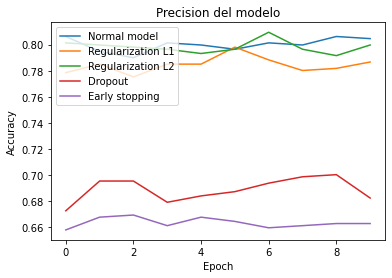

In [63]:
plt.figure(1)
# Graficar accuracy del modelo
plt.title('Precision del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.plot(history4.history['accuracy'])
plt.plot(history5.history['accuracy'])
plt.plot(history6.history['accuracy'])
plt.plot(history7.history['accuracy'])
plt.plot(history8.history['accuracy'])

plt.legend(['Normal model', 'Regularization L1', 'Regularization L2', 'Dropout', 'Early stopping' ], loc='upper left')
plt.show()

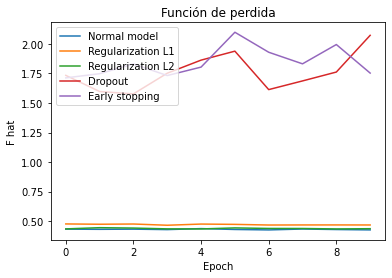

In [64]:
plt.figure(2)
# Graficar la función de pérdida evaluada
plt.title('Función de perdida')
plt.ylabel('F hat')
plt.xlabel('Epoch')
plt.plot(history.history['loss'])
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(historydp.history['loss'])
plt.plot(historyes.history['loss'])
plt.legend(['Normal model', 'Regularization L1', 'Regularization L2', 'Dropout', 'Early stopping' ], loc='upper left')
plt.show()